# Redes Neuronales - TP3

Autor: Gustavo Quintero

10 de Diciembre 2022

## 1. Librerias

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy.io

## 2. Introducción

### Red de Kohonen

Es una red neuronal que permite hacer agrupación de datos, cuando no se conocen la relación de éstos previamente, en un mapa auto-organizado, de manera similar a como ocurre en el cerebro humano. Aplica el entrenamiento no supervisado y el aprendizaje competitivo con el objetivo de clasificar los datos de entrada similares en una misma categoría o grupo que activen una misma unidad de salida en zonas próximas. Los grupo así formados son disjuntos entre si (diferentes)

### ¿Qué es un mapa auto-organizado?.

Es una RNA inspirada en la capacidad del cerebro humano de reconocer u extraer rasgos y características relevantes del mundo que lo rodea, donde se supone que los datos de entrada pertenecen a una clase o grupo que se define a partir de las características comunes a ellos; y que la red pueda identificar en toda la gamma de datos de entrada que se le suministra.

Un mapa auto-organizado está compuesto por dos capas de neuronas. La capa de entrada y la de salida. La capa de entrada tiene una neurona por cada componente de entrada (característica, rasgo,...) ésta recibe la información la envía a la capa de salida quien es la responsable de procesar los datos y generar la organización o agrupamiento de las neuronas que permite reconocer los rasgos comunes.

Los mapas auto-organizados aprenden a través de la competencia que se presenta entre sí en las neuronas de salida de un mismo grupo o categoría para ser activada. Esta neurona de salida activada recibe el nombre de **neurona ganadora**. Esta competencia se puede implementar entre las neuronas porque poseen conexiones de inhibición entre sí. Este proceso de entrenamiento se realiza presentando a la red solo entradas en el proceso iterativo.

El mapa auto-organizado en cada iteración va realizando el proceso de agrupamiento y su visualización, se representa en forma de malla de dos dimensiones o unidimensional.

Los mapas auto-organizados no requieren de determinarsele un objetivo o buscar o presentar como resultado final de su proceso.

### Mapas Topográficos.

Los estudios neurobiólogicos indican que diferentes entradas sensoriales (motoras, visuales, auditivas,...) se mapean en las áreas correspondientes de la corteza cerebral de manera ordenada. Estas formas de mapa topográfico, tienen dos propiedades importantes:

 - En cada etapa de representación o procesamiento, cada dato de información entrante es mantenido en su propio contexto/vecindario.
 
 - Las neuronas que se ocupan de los datos de información estrechamente relacionadas y se mantienen juntas para que puedan interacturar a través de conexiones sinápticas cortas.
 
El objetivo, es construir mapas topográficos artificiales que aprendan a través de la auto-oganización de una manera neurobiológicamente inesperada.

### Proceso Competitivo
 
 El objetivo del algoritmo de aprendizaje de la red ''MAO'' es almacenar un conjunto de datos de entrada, cada entrada la denotaremos por $\xi\in R$ con $\xi=(\xi_1, \xi_2,\ldots,\xi_n)$ que toman valores binarios $0/1$, a través de las cuales se determinan un conjunto de pesos $\omega_i$ cuyas componentes son los pesos sinápticos $\omega_{ij}$ conexión entre las neuronas $i$ y las neuronas $j$ $(1\leq i\leq n,$ y $1\leq j\leq$ donde $m$ es el número total de neuronas). En esta red existe una sola capa de salida de unidad $O_i$ (que toma valores binarios $0/1$) cada una conectada al conjunto de entrada a través de conexiones excitatórias. La Figura 1 muestra la arquitectura.
 
 <img src="red123.jpg" width="450">
 
 
 
 
 Sólo una de las $i$-ésimas neuronas de salida, llamada **ganadora** se puede activar a la vez. La ganadora es normalmente la unidad con la entrada neta más grande.
 
 $$h_i=\sum_{j=1}^m\omega_{ij}\xi_{ij}=\omega_i^{T}\cdot\xi\hspace{1cm}(1)$$

para el patrón de entrada $\xi=(\xi_1, \xi_2,\ldots,\xi_n)$ y peso $\omega_i^T=(\omega_{i1}, \omega_{i2},\ldots,\omega_{im})^T$. Así, el problema es hallar $i^*$-ésima unidad ganadora con salida $O_{i^*}=1$. Esto es, hallar $i^*\in\lbrace 1,\ldots,m\rbrace$ tal que

$$\omega_i^T\cdot\xi\leq\omega_{i^*}^T\cdot\xi\hspace{1cm}(2)$$

$\langle\omega_i;\xi\rangle=\sqrt{\omega_i^T\cdot\xi}$ define un producto interno, el cual induce una norma. 

Si los pesos sinápticos de cada unidad se normalizan, es decir $\Vert\omega_i\Vert=1\;1\leq i\leq m$, entonces el problema (2) es equivalente a hallar un $\omega_{i^*}$ que más se acerque al patrón de entrada $\xi$ tal que

$$\Vert\omega_{i^*}-\xi\Vert\leq\Vert\omega_i-\xi\Vert\hspace{0.5cm}1\leq i\leq m\hspace{1cm}(3)$$

Equivalente a hallar $i^*\in\lbrace 1,\ldots,m\rbrace$ tal que

$$d^2(\omega_i,\xi)\leq d_i^2(\omega_i,\xi)\hspace{0.5cm}1\leq i\leq m\hspace{1cm}(4)$$

donde $d_i^2(\omega_i,\xi)=\sum_{j=1}^{n}\Vert\omega_{ij}-\xi_j\Vert^2$.

Equivalente a hallar $i^*\in\lbrace 1,\ldots,m\rbrace$ tal que

$$d^2(\omega_{i^*},\xi)= \min_{1\leq i\leq m} d^2(\omega_i,\xi)\hspace{1cm}(5)$$

En otras palabras, la neurona cuyo vector de peso se acerca más al vector de entrada (es decir, el más aproximado a él) es declarada ganadora.

De esta forma, el espacio de entrada continuo puede mapearse al espacio de salida discreta de las neuronas mediante un simple proceso de competencia entre las neuronas.

### Proceso Coperativo

Los estudios neurobiológicos muestran que existen interacciones laterales dentro de un conjunto de neuronas excitadas. Cuando se activa sus vecinas más proximas tienden a excitarase en comparación a las más lejanas. Esto es, una neurona excitada tiene influencia sobre sus vecinas.

Ahora, queremos definir un vecindario topológico similar para las neuronas de la red ''MAO''. Sea $\Vert r_i-r_{i^*}\Vert$ la distancia lateral entre las neuronas $i^*$ e $i$ en la cuadrícula de neuronas, definamos la función vecindad por

$$\Lambda(i^*,i)=\exp(-\Vert r_i-r_{i^*}\Vert^2/2\sigma^2)$$

como en una vecindad topológica, donde $i^*$ es el índice de la neurona ganadora. Esta función $\Lambda$ tiene varias propiedades:

 - $\Lambda$ tiene un máximo en $(i^*, i^*)$
 - $\Lambda$ decree monótonamente hacia cero a medida que la distancia lateral $\Vert r_i - r_{i^*} \Vert$ tiende al infinito.
 - $\Lambda$ es simétrica, es decir, $\Lambda(i^*,i)=\Lambda(i,i^*)$
 - $\Lambda$ es invariante por traslación (es decir, independiente de la neurona ganadora).
 - $\Lambda$ permite determina la cercanía de las neuronas con la neurona ganadora. Lo que permite un ordenamiento más rápido del mapa y preservación del orden de cada interacción.
  
Una característica especial de la red ´´MAO´´ es que el tamaño $\sigma$ del entorno debe disminuir con el tiempo. Una dependencia temporal es un decaimiento exponencial 

$$\sigma(t)=\sigma_0 e^{-t/\tau_0}$$

donde $\sigma_0$ es el tamaño inicial del vecindarío.

### Proceso Adaptativo

Claramento, la red ''MAO'' debe implicar algún tipo de proceso de adaptación o aprendizaje mediante el cual las salidas se auto-organizan y se forma el mapa de características entre entrada y salida.

El objetivo de la vecindad topográfica es que tanto la neurona ganadora como sus vecinas obtengan sus pesos actualizados. En la práctica, la ecuación de actualización de peso apropiado es

$$\Delta\omega_{ij}=\eta\Lambda(i^*, i)(\xi_j-\omega_{ij}) \hspace{0.5cm} 1\leq i\leq m, 1\leq j\leq n$$.

donde $\eta$ es una constante de aprendizaje que da cuenta de la importancia que la diferencia entre el patrón y los pesos tienen en el ajuste de los mismos a lo largo del proceso de aprendizaje.

El efecto de cada actualización del peso de aprendizaje es mover los pesos $\omega_i$, las $i^*$-ésimas neuronas ganadoras y sus vecindades que más se aproximan al patrón de entrada $\xi$.

### Algoritmo de la red de Kohonen

 1. Escoger aleatoriamente un patrón $\xi$ del conjunto de entrenamiento.
 
 2. Calcular la distancia Euclidiana entre el patrón $\xi$ y el peso $\omega_i$, para cada $i$-ésima neurona
 
 $$d_i^2(\omega_i,\xi)=\sum_{j=1}^{n}(\omega_{ij}-\xi_j)^2\hspace{0.5cm}1\leq i\leq m$$.
 
 3. Hallar una neurona $i^*$-ésima ganadora tal que
 
 $$d^2(\omega_{i^*},\xi)= \min_{1\leq i\leq m} d^2(\omega_i,\xi_j)$$
 
 4. Calcular la distancia entre la neurona $i^*$-ésima ganadora y el resto de las neuronas $\Vert r_i-r_{i^*}\Vert\hspace{0.5cm}(1\leq i\leq m)$.
 
 5. Aplicar la función vecindad $\Lambda$ a todas las neuronas con la neurona ganadora para determinar su cercanía.
 
 6. Actualizar los pesos sinápticos $\omega_{ij}$:
 
 $$\Delta \omega_{ij}=\eta\Lambda(i^*, i)(\xi_j-\omega_{ij})\hspace{0.5cm}1\leq i\leq m,\; 1\leq j\leq n$$
 
 7. Actualizar el ancho de la vecindad $\sigma$

## 3. Problemas

### 3.1. Construya una red de Kohonen de 2 entradas que aprenda una distribución uniforme dentro del círculo unitario. Mostrar el mapa de preservación de topología. Probar con distribuciones uniformes dentro de otras figuras geométricas.

Primero, se definen dos funciones, una que permite construir la distribución uniforme de datos que la red debe aprender, y otra que corresponde con el entrenamiento de la red.

In [2]:
def data(N, fig):
    if fig == 'Square':
        x = np.random.uniform(-1,1,N)
        y = np.random.uniform(-1,1,N)
    elif fig == 'Circle':
        x = np.random.uniform(-1,1,N)
        y = np.array([random.uniform(-math.sqrt(1 - v**2), math.sqrt(1 - v**2)) for v in x ]) 
    elif fig == 'Parable':
        x = np.random.uniform(1,2,int(N))
        y = np.array([random.uniform(-math.sqrt(v**2-1), math.sqrt(v**2-1)) for v in x ])
    elif fig == 'Hyperbola':
        x = np.concatenate((np.random.uniform(-2,-1,int(N/2)), np.random.uniform(1,2,int(N/2))))
        y = np.array([random.uniform(-math.sqrt(v**2-1), math.sqrt(v**2-1)) for v in x ])
        if N%2 != 0:
            return np.array([[x[i], y[i]] for i in range(N-1)])
    else:
        np.random.seed(0)
        x = np.random.normal(0, 1, N)
        y = np.random.normal(0, 1, N)
    return np.array([[x[i], y[i]] for i in range(N)])

def Kohonen_train(xi, N, sigma, eta, step, lim):
    W = np.array([np.random.uniform(-0.01, 0.01, xi.shape[1]) for i in range(N)])
    #W = np.array([np.random.normal(0, 1, xi.shape[1]) for i in range(N)])
    M = int(math.sqrt(N))
    
    while sigma > lim:
        np.random.shuffle(xi)
        for vector in xi:
            dist = np.array([math.sqrt(np.sum((vector - weights)**2)) for weights in W])
            loc = np.where(dist == np.min(dist))[0][0]
    
            neighbours = np.array([np.array([math.exp(-math.sqrt(np.sum((np.array([i,j])-np.array([loc//M, loc%M]))**2))**2/(2*sigma**2)) 
                                         for j in range(M)]) for i in range(M)])
    
            neighbours = neighbours.flatten()
            for i in range(len(W)):
                for j in range(2):
                    W[i][j] += eta*neighbours[i]*(vector[j] - W[i][j])
                    
                    
        sigma -= sigma*step 
    return W

 - Mapa de preservación topologica
 
 <img src="Kohonencir.gif" width="450" align="left">  

 - Entrenamiento de la red de Kohonen con otras distribuciones uniformes de datos dentro de otras figuras geométricas.

In [3]:
L = 100
N = 100
lim = 0.1
step = 0.01
eta = 0.6
sigma = 2

xi_1 = data(L, fig ='Square')
W_1 = Kohonen_train(xi_1, N, sigma, eta, step, lim)

xi_2 = data(L, fig ='Circle')
W_2 = Kohonen_train(xi_2, N, sigma, eta, step, lim)

xi_3 = data(L, fig ='Parable')
W_3 = Kohonen_train(xi_3, N, sigma, eta, step, lim)

xi_4 = data(L, fig ='Hyperbola')
W_4 = Kohonen_train(xi_4, N, sigma, eta, step, lim)

<IPython.core.display.Javascript object>


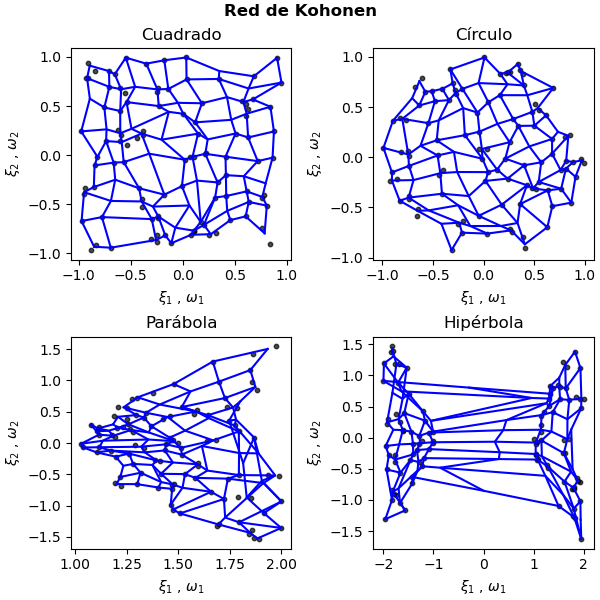

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(6,6))
M = int(math.sqrt(N))
fig.suptitle('Red de Kohonen', fontweight ="bold")

ax[0, 0].plot()
ax[0, 0].plot(W_1[:,0].reshape(M, M), W_1[:,1].reshape(M, M), color='blue')
ax[0, 0].plot(np.transpose(W_1[:,0].reshape(M, M)), np.transpose(W_1[:,1].reshape(M, M)), color = 'blue')
ax[0, 0].scatter(xi_1[:,0], xi_1[:,1], alpha=0.7, s= 10, color='black')
ax[0, 0].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[0, 0].set_ylabel(r'$\xi_2$ , $\omega_2$')
ax[0, 0].set_title('Cuadrado')

ax[0, 1].plot()
ax[0, 1].plot(W_2[:,0].reshape(M, M), W_2[:,1].reshape(M, M), color='blue')
ax[0, 1].plot(np.transpose(W_2[:,0].reshape(M, M)), np.transpose(W_2[:,1].reshape(M, M)), color = 'blue')
ax[0, 1].scatter(xi_2[:,0], xi_2[:,1], alpha=0.7, s= 10, color='black')
ax[0, 1].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[0, 1].set_ylabel(r'$\xi_2$ , $\omega_2$')
ax[0, 1].set_title('Círculo')


ax[1, 0].plot()
ax[1, 0].plot(W_3[:,0].reshape(M, M), W_3[:,1].reshape(M, M), color='blue')
ax[1, 0].plot(np.transpose(W_3[:,0].reshape(M, M)), np.transpose(W_3[:,1].reshape(M, M)), color = 'blue')
ax[1, 0].scatter(xi_3[:,0], xi_3[:,1], alpha=0.7, s= 10, color='black')
ax[1, 0].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[1, 0].set_ylabel(r'$\xi_2$ , $\omega_2$')
ax[1, 0].set_title('Parábola')

ax[1, 1].plot()
ax[1, 1].plot(W_4[:,0].reshape(M, M), W_4[:,1].reshape(M, M), color='blue')
ax[1, 1].plot(np.transpose(W_4[:,0].reshape(M, M)), np.transpose(W_4[:,1].reshape(M, M)), color = 'blue')
ax[1, 1].scatter(xi_4[:,0], xi_4[:,1], alpha=0.7, s= 10, color='black')
ax[1, 1].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[1, 1].set_ylabel(r'$\xi_2$ , $\omega_2$')
ax[1, 1].set_title('Hipérbola')

plt.show()

### 3.2 Resuelva (aproximadamente) el “Traveling salesman problem” para 200 ciudades con una red de Kohonen.

Ahora, se modifica la función de entrenamiento de la red para establecer una conexión circular entre las neuronas y poder resolver este problema

In [5]:
def Kohonen_train(xi, N, sigma, eta, step, lim):
    W = np.array([np.random.uniform(-0.5, 0.5, xi.shape[1]) for i in range(N)])
    #W = np.array([np.random.uniform(0, 1, xi.shape[1]) for i in range(N)])
    while sigma > lim:
        np.random.shuffle(xi)
        for vector in xi:
            dist = np.array([math.sqrt(np.sum((vector - weights)**2)) for weights in W])
            loc = np.where(dist == np.min(dist))[0][0]
            
            neighbours = np.array([math.exp(-math.sqrt(np.sum((np.array([math.sin((2*math.pi)/N*i), math.cos((2*math.pi)/N*i)])-np.array([math.sin((2*math.pi)/N*loc),math.cos((2*math.pi)/N*loc)]))**2))**2/(2*sigma**2)) 
                                   for i in range(N)])
    
            for i in range(len(W)):
                for j in range(2):
                    W[i][j] += eta*neighbours[i]*(vector[j] - W[i][j])
        sigma -= sigma*step
    return W

Se prueba la red con este nuevo tipo de conexión para el problema con 10 ciudades

In [6]:
L = 10
N = 10
lim = 0.1
step = 0.01
eta = 0.6
sigma = 2

xi_1 = data(10, fig='')
W_1 = Kohonen_train(xi_1, N, sigma, eta, step, lim)

xi_2 = data(10, fig='')
W_2 = Kohonen_train(xi_2, 20, sigma, eta, step, lim)

<IPython.core.display.Javascript object>


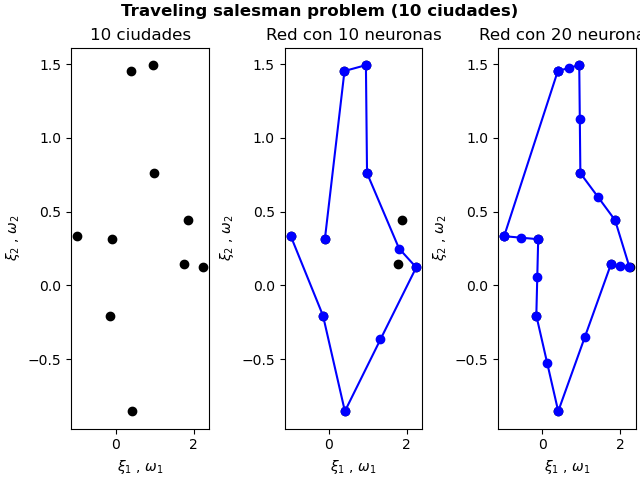

In [7]:
fig, ax = plt.subplots(ncols=3, nrows=1, constrained_layout=True)

fig.suptitle(f'Traveling salesman problem (10 ciudades)', fontweight ="bold")

ax[0].set_title(f'{L} ciudades')
ax[0].scatter(xi_1[:,0], xi_1[:,1], color='black')
ax[0].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[0].set_ylabel(r'$\xi_2$ , $\omega_2$')

ax[1].set_title(f'Red con 10 neuronas')
ax[1].plot(W_1[:,0], W_1[:,1], '-ob')
ax[1].scatter(xi_1[:,0], xi_1[:,1], color='black')
ax[1].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[1].set_ylabel(r'$\xi_2$ , $\omega_2$')

ax[2].set_title(f'Red con 20 neuronas')
ax[2].plot(W_2[:,0], W_2[:,1], '-ob')
ax[2].scatter(xi_2[:,0], xi_2[:,1], color='black')
ax[2].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[2].set_ylabel(r'$\xi_2$ , $\omega_2$')

plt.show()

Una vez verificado que la red funciona, se procede a resolver el problema con 200 ciudades.

In [8]:
L = 200
N = 225
lim = 0.01
step = 0.01
eta = 0.6
sigma = 0.3

xi = data(L, fig='')
W = Kohonen_train(xi, N, sigma, eta, step, lim)

<IPython.core.display.Javascript object>


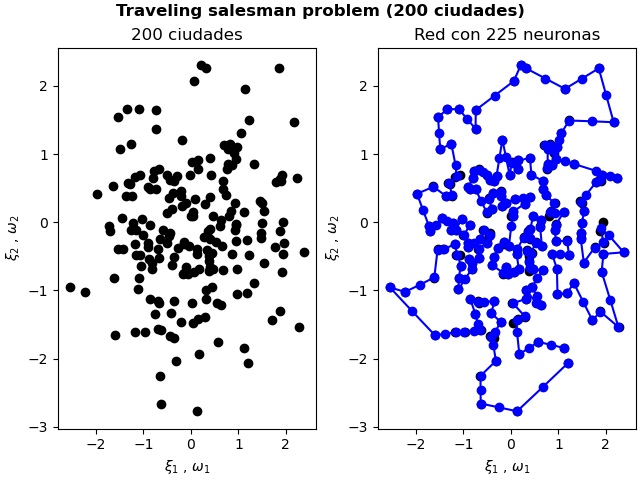

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=1, constrained_layout=True)

fig.suptitle(f'Traveling salesman problem ({L} ciudades)', fontweight ="bold")

ax[0].set_title(f'{L} ciudades')
ax[0].scatter(xi[:,0], xi[:,1], color='black')
ax[0].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[0].set_ylabel(r'$\xi_2$ , $\omega_2$')

ax[1].set_title(f'Red con {N} neuronas')
ax[1].plot(W[:,0], W[:,1], '-ob')
ax[1].scatter(xi[:,0], xi[:,1], color='black')
ax[1].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[1].set_ylabel(r'$\xi_2$ , $\omega_2$')

plt.show()

### 3.3 En el archivo “datos_para_clustering.mat” encontrará una matriz de datos de 500 mediciones de una variable de 100 dimensiones.

### a) Utilice una red de Kohonen para reducir la dimensionalidad de los datos.

Se vuelve a modificar la función de entrenamiento de la red al caso del primer problema para poder disminuir la dimensionalida de los datos

In [10]:
def Kohonen_train(xi, N, sigma, eta, step, lim):
    W = np.array([np.random.uniform(-0.01, 0.01, xi.shape[1]) for i in range(N)])
    #W = np.array([np.random.normal(0, 1, xi.shape[1]) for i in range(N)])
    M = int(math.sqrt(N))
    
    while sigma > lim:
        np.random.shuffle(xi)
        for vector in xi:
            dist = np.array([math.sqrt(np.sum((vector - weights)**2)) for weights in W])
            loc = np.where(dist == np.min(dist))[0][0]
    
            neighbours = np.array([np.array([math.exp(-math.sqrt(np.sum((np.array([i,j])-np.array([loc//M, loc%M]))**2))**2/(2*sigma**2)) 
                                         for j in range(M)]) for i in range(M)])
    
            neighbours = neighbours.flatten()
            for i in range(len(W)):
                for j in range(2):
                    W[i][j] += eta*neighbours[i]*(vector[j] - W[i][j])
                    
        sigma -= sigma*step 
    return W

In [11]:
data = scipy.io.loadmat('datos_para_clustering.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'datos'])

In [12]:
xi = data['datos']
xi.shape

(500, 100)

In [13]:
N = 225
lim = 0.05
step = 0.05
eta = 0.6
sigma = 2

W = Kohonen_train(xi, N, sigma, eta, step, lim)

### b) Verifique la presencia de clusters, e indique cuantos puede visualizar haciendo uso de la matriz U.

In [14]:
def clusters(W):
    M = int(math.sqrt(len(W)))
    W = W.reshape(M,M, W.shape[1])
    
    U = []
    for i in range(M):
        for j in range(M):
            if i == 0 and j == 0:
                U.append(math.sqrt(np.sum((W[i][j]-W[i][j+1])**2)) + math.sqrt(np.sum((W[i][j]-W[i+1][j])**2)))
            elif (i > 0 and i < M-1) and j == 0:
                U.append(math.sqrt(np.sum((W[i][j]-W[i-1][j])**2)) + math.sqrt(np.sum((W[i][j]-W[i+1][j])**2)) 
                        + math.sqrt(np.sum((W[i][j]-W[i][j+1])**2)))
            elif i == M-1 and j == 0:
                U.append(math.sqrt(np.sum((W[i][j]-W[i-1][j])**2)) + math.sqrt(np.sum((W[i][j]-W[i][j+1])**2)))
            elif i == 0 and (j > 0 and j < M-1):
                U.append(math.sqrt(np.sum((W[i][j]-W[i][j-1])**2)) + math.sqrt(np.sum((W[i][j]-W[i][j+1])**2)) 
                        + math.sqrt(np.sum((W[i][j]-W[i+1][j])**2)))
            elif i == 0 and j == M-1:
                U.append(math.sqrt(np.sum((W[i][j]-W[i][j-1])**2)) + math.sqrt(np.sum((W[i][j]-W[i+1][j])**2)))
            elif (i > 0 and i < M-1) and j == M-1:
                U.append(math.sqrt(np.sum((W[i][j]-W[i-1][j])**2)) + math.sqrt(np.sum((W[i][j]-W[i+1][j])**2)) 
                        + math.sqrt(np.sum((W[i][j]-W[i][j-1])**2)))
            elif i == M-1 and j == M-1:
                 U.append(math.sqrt(np.sum((W[i][j]-W[i-1][j])**2)) + math.sqrt(np.sum((W[i][j]-W[i][j-1])**2)))
            elif i == M-1 and (j > 0 and j < M-1):
                U.append(math.sqrt(np.sum((W[i][j]-W[i][j-1])**2)) + math.sqrt(np.sum((W[i][j]-W[i][j+1])**2)) 
                        + math.sqrt(np.sum((W[i][j]-W[i-1][j])**2)))
            else:
                U.append(math.sqrt(np.sum((W[i][j]-W[i][j-1])**2)) + math.sqrt(np.sum((W[i][j]-W[i][j+1])**2)) 
                        + math.sqrt(np.sum((W[i][j]-W[i-1][j])**2)) + math.sqrt(np.sum((W[i][j]-W[i+1][j])**2)))
    
    return np.array(U).reshape(M, M)

In [15]:
U = clusters(W)

<IPython.core.display.Javascript object>


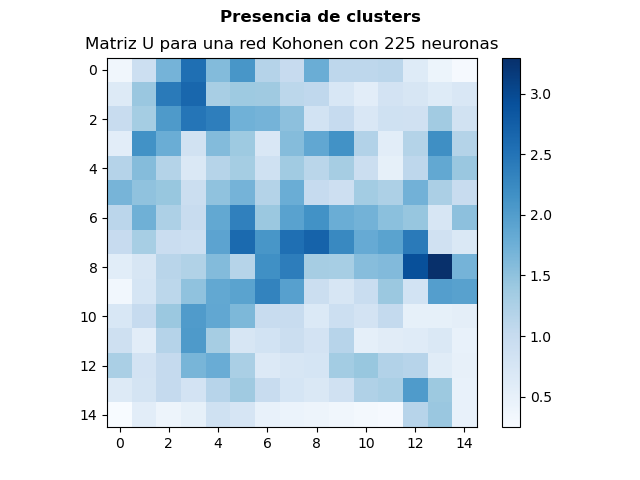

In [16]:
plt.suptitle(f'Presencia de clusters', fontweight ="bold")

plt.title(f'Matriz U para una red Kohonen con {N} neuronas')

plt.imshow(U, cmap ='Blues')
plt.colorbar()
plt.show()